
# TASK 2

Company X has an online store that facilitates the sale of goods from various suppliers to their customers. These suppliers sell similar goods and thus compete for the same customers. You’ve been tasked with creating a monthly insights package for these suppliers that will provide them data on how they are performing, along with any additional insights that would provide value for them. Please use the attached dataset titled ‘Company X - Q2’ to create a sample package for November 2018 for Supplier C.


Import Packages

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import src.eda as eda

sns.set_palette('Set2')

import warnings
warnings.filterwarnings('ignore')

Load the data to a pandas data frame

In [209]:
df_2= pd.read_excel("data/Company_X_Q2.xlsx")
df = df_2
df_3 = pd.read_excel("data/Company_X_Q3.xlsx") # just checking if there is an oppurtunity to concatinate the datasets.

Have a look at it

In [210]:
df.head()

,Order Number,Sku,Quantity Sold,Unit Price,Order Date,Product Type,Supplier,Customer First Name,Customer Last Name,Customer Gender,Customer Street Address,Customer City,Customer State,Customer Zipcode
0,2,B-17139,3,2.29,2018-10-01,Industrial,B,Levi,Peattie,Male,99 Hayes Crossing,Spring,Texas,77388
1,2,C-15849,1,4.86,2018-10-01,Clothing,C,Levi,Peattie,Male,99 Hayes Crossing,Spring,Texas,77388
2,3,A-22815,3,2.11,2018-10-01,Toys,A,Maribelle,Fuzzey,Female,22 Corry Hill,Cumming,Georgia,30130
3,5,A-21230,1,2.69,2018-10-01,Sports,A,Barclay,Crangle,Male,723 Tennyson Point,Portland,Oregon,97221
4,5,E-7579,3,3.59,2018-10-01,Jewelery,E,Barclay,Crangle,Male,723 Tennyson Point,Portland,Oregon,97221


The dataset presents number of orders and their data per supplier.

In [211]:
df.shape

(5000, 14)


Size: 5000 rows, 14 features

What are those features?

In [212]:
df.columns

Index(['Order Number', 'Sku', 'Quantity Sold', 'Unit Price', 'Order Date',
       'Product Type', 'Supplier', 'Customer First Name', 'Customer Last Name',
       'Customer Gender', 'Customer Street Address', 'Customer City',
       'Customer State', 'Customer Zipcode'],
      dtype='object')

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
Order Number               5000 non-null int64
Sku                        5000 non-null object
Quantity Sold              5000 non-null int64
Unit Price                 5000 non-null float64
Order Date                 5000 non-null datetime64[ns]
Product Type               5000 non-null object
Supplier                   5000 non-null object
Customer First Name        5000 non-null object
Customer Last Name         5000 non-null object
Customer Gender            5000 non-null object
Customer Street Address    5000 non-null object
Customer City              5000 non-null object
Customer State             5000 non-null object
Customer Zipcode           5000 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 547.0+ KB


Before I start let me tell the audience what I see here on this dataset:

It is a dataset which accounts for products delivered by suppliers.

Just wanted to highlight that because the number of products seems to be different from the number of orders.

An order may account for more than a single supplier.

The data presents no null values.

# EDA

Notes:


In accordance with the task in hand, the analysis shall be concentrated on supplier C and November.


In other words, most of the analysis will be done on a subset of the given data.

Before any kind of analisis, we will need the **total revenue add** one way or another.

In [214]:
df['total'] = round(df['Unit Price'] * df['Quantity Sold'],1)

**Supplier Comparison: number of data points**

Number of data points for supplier B is 1151 ( 23.0% )
Number of data points for supplier E is 976 ( 19.5% )
Number of data points for supplier F is 824 ( 16.5% )
Number of data points for supplier C is 677 ( 13.5% )
Number of data points for supplier A is 530 ( 10.6% )
Number of data points for supplier G is 456 ( 9.1% )
Number of data points for supplier D is 386 ( 7.7% )


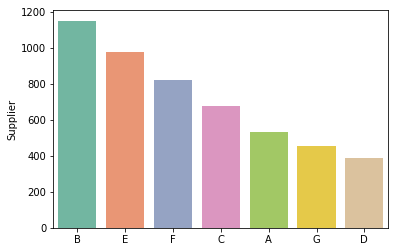

In [219]:
eda.class_balance_sup(df,'Supplier')

**Supplier Comparison: number of data points (ONLY November)**

In [220]:
df_nov = df[df['Order Date'].dt.month == 11]

Number of data points for supplier B is 581 ( 23.4% )
Number of data points for supplier E is 487 ( 19.7% )
Number of data points for supplier F is 391 ( 15.8% )
Number of data points for supplier C is 329 ( 13.3% )
Number of data points for supplier A is 272 ( 11.0% )
Number of data points for supplier G is 227 ( 9.2% )
Number of data points for supplier D is 191 ( 7.7% )


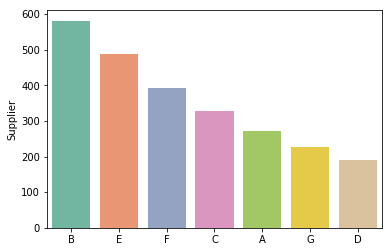

In [221]:
eda.class_balance_sup(df_nov,'Supplier')  

13.5 % of all product sales account for Supplier C.

**Supplier Comparison: total(October + November)**

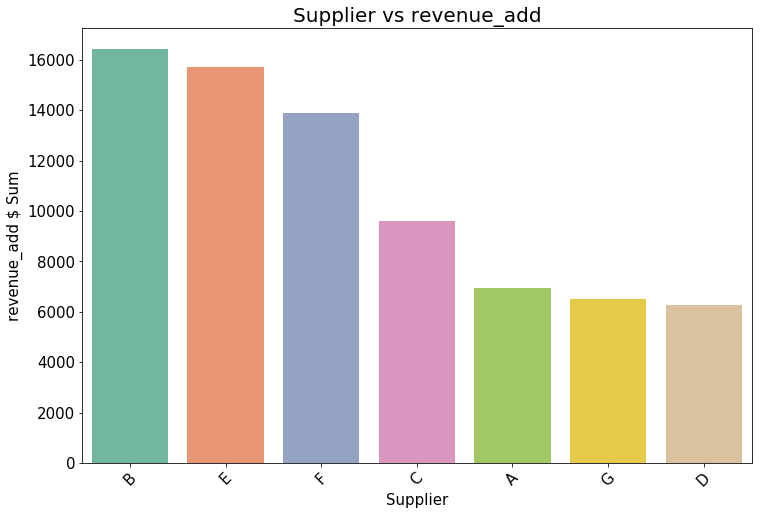

In [222]:
rev_add_supplier = df.groupby('Supplier').total.sum().values
suppliers = df.groupby('Supplier').total.sum().keys()

sorted_supplier_value_add = np.argsort(df.groupby('Supplier').total.sum().values)[::-1]

df_supplier = pd.DataFrame(columns=['Supplier', 'revenue_add'])
df_supplier['Supplier'] = suppliers[sorted_supplier_value_add]
df_supplier['revenue_add'] = rev_add_supplier[sorted_supplier_value_add]

eda.class_vs_numerical(df_supplier,'Supplier','revenue_add', 45)

**Supplier Comparison: total(ONLY November)**

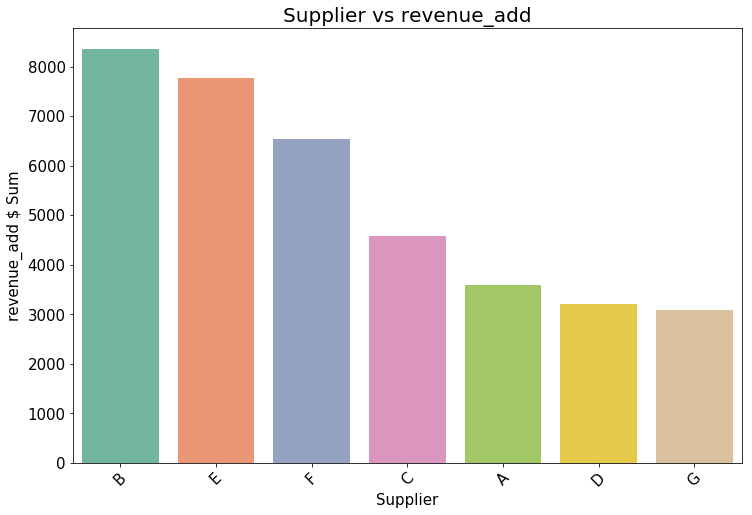

Monthly revenue add by B is $8363.0 22.5%
Monthly revenue add by E is $7782.0 20.9%
Monthly revenue add by F is $6544.0 17.6%
Monthly revenue add by C is $4580.0 12.3%
Monthly revenue add by A is $3587.0 9.7%
Monthly revenue add by D is $3213.0 8.6%
Monthly revenue add by G is $3098.0 8.3%


In [223]:
df_nov = df[df['Order Date'].dt.month == 11]
rev_add_supplier = df_nov.groupby('Supplier').total.sum().values
suppliers = df_nov.groupby('Supplier').total.sum().keys()

sorted_supplier_value_add = np.argsort(df_nov.groupby('Supplier').total.sum().values)[::-1]

df_supplier_nov = pd.DataFrame(columns=['Supplier', 'revenue_add'])
df_supplier_nov['Supplier'] = suppliers[sorted_supplier_value_add]
df_supplier_nov['revenue_add'] = rev_add_supplier[sorted_supplier_value_add]

eda.class_vs_numerical(df_supplier_nov,'Supplier','revenue_add', 45)

for i in range(len(df_supplier_nov['Supplier'].values)):
    print(f"Monthly revenue add by {df_supplier_nov['Supplier'].values[i]} is ${round(df_supplier_nov['revenue_add'][i])} {round((df_supplier_nov['revenue_add'][i] / df_supplier_nov['revenue_add'].sum())*100,1)}%")

In [225]:
df_supplier_nov  # created this one so I can summarize the suppliers

,Supplier,revenue_add
0,B,8363.3
1,E,7782.1
2,F,6544.4
3,C,4580.2
4,A,3586.9
5,D,3213.3
6,G,3098.5


In [226]:
df_supplier_nov['revenue_add_ratio']          = round((df_supplier_nov['revenue_add']  / (df_supplier_nov['revenue_add'].sum()))*100,1).astype(str) + "%"

In [227]:
df_supplier_nov

,Supplier,revenue_add,revenue_add_ratio
0,B,8363.3,22.5%
1,E,7782.1,20.9%
2,F,6544.4,17.6%
3,C,4580.2,12.3%
4,A,3586.9,9.7%
5,D,3213.3,8.6%
6,G,3098.5,8.3%


In [228]:
df_supplier_nov['data_point_count'] = np.array([581,487,391,329,272,227,191])

In [229]:
df_supplier_nov

,Supplier,revenue_add,revenue_add_ratio,data_point_count
0,B,8363.3,22.5%,581
1,E,7782.1,20.9%,487
2,F,6544.4,17.6%,391
3,C,4580.2,12.3%,329
4,A,3586.9,9.7%,272
5,D,3213.3,8.6%,227
6,G,3098.5,8.3%,191


That's a good start however it will be more presentable if I sort the values on the table only in accordance with the alphabet.

In [230]:
df_supplier_nov = df_supplier_nov.sort_values(by=['Supplier'])

In [231]:
df_supplier_nov

,Supplier,revenue_add,revenue_add_ratio,data_point_count
4,A,3586.9,9.7%,272
0,B,8363.3,22.5%,581
3,C,4580.2,12.3%,329
5,D,3213.3,8.6%,227
1,E,7782.1,20.9%,487
2,F,6544.4,17.6%,391
6,G,3098.5,8.3%,191


**Unique Order Count**


In [235]:
unique_order_count = []
for i in range(len(df_nov.groupby(['Supplier'])['Order Number'].unique())):
    unique_order_count.append(len(df_nov.groupby(['Supplier'])['Order Number'].unique()[i]))

In [236]:
df_supplier_nov['unique_order_count'] = unique_order_count

In [237]:
df_supplier_nov

,Supplier,revenue_add,revenue_add_ratio,data_point_count,unique_order_count
4,A,3586.9,9.7%,272,252
0,B,8363.3,22.5%,581,495
3,C,4580.2,12.3%,329,303
5,D,3213.3,8.6%,227,180
1,E,7782.1,20.9%,487,432
2,F,6544.4,17.6%,391,352
6,G,3098.5,8.3%,191,207


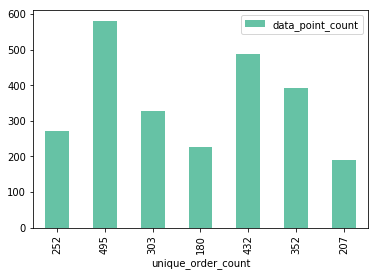

In [238]:
df_supplier_nov.plot(x='unique_order_count', y='data_point_count', kind='bar') 
plt.show()

You can do better than that one... Stay focussed, remember the rule: tell a data story.

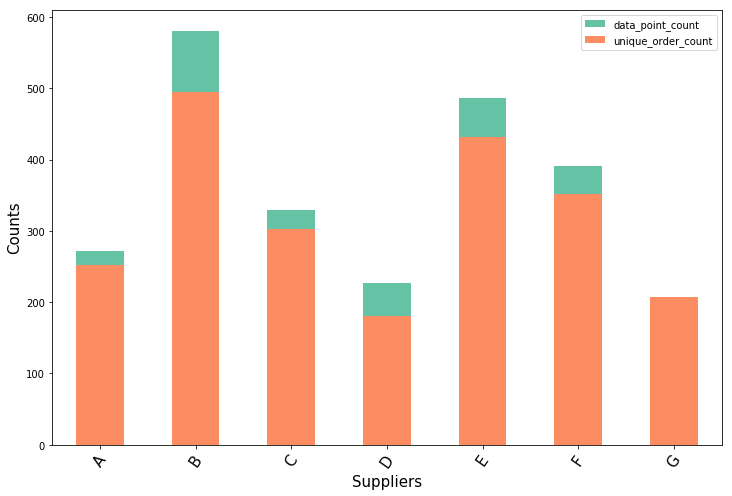

In [239]:
ax = df_supplier_nov.plot(x="Supplier", y="data_point_count", kind="bar", figsize=(12,8))
# df_supplier_nov.plot(x="Supplier", y="data_point_count", kind="bar", ax=ax, color="C2")
df_supplier_nov.plot(x="Supplier", y="unique_order_count", kind="bar", ax=ax, color="C1")
plt.xticks(rotation=55, fontsize= 15)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Suppliers', fontsize=15)

plt.show()

**Supplier Comparison: Gender**

Not a significant difference between the comparison for number of data points and revenue add.

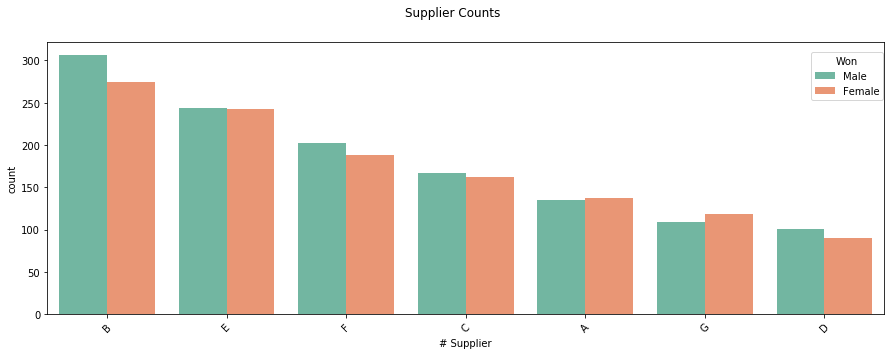

In [240]:
eda.barplot_vs(df_nov,'Supplier','Customer Gender')

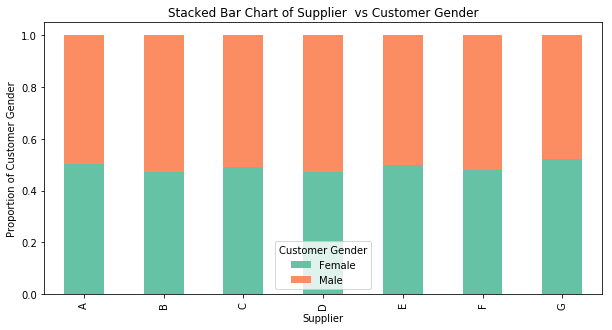

In [241]:
eda.stacked_bar_chart(df_nov,'Supplier','Customer Gender')

**Following function will add 2 columns to the data frame.**

- if customer is male 1 for male column
- if customer is female 1 for female column

In [242]:
def ladies_first(x):
    if x == 'Female':
        return 1
    else:
        return 0

def patience_guys(x):
    if x =='Male':
        return 1
    else:
        return 0
df_nov['Female'] = df['Customer Gender'].map(ladies_first)
df_nov['Male']   = df['Customer Gender'].map(patience_guys)

df_supplier_nov_female = df_nov.groupby('Supplier').Female.sum()
df_supplier_nov_male   =   df_nov.groupby('Supplier').Male.sum() 

Checking before I add these to the supplier data_frame

In [243]:
df_supplier_nov_female

Supplier
A    137
B    275
C    162
D     90
E    243
F    188
G    118
Name: Female, dtype: int64

In [244]:
df_supplier_nov_male

Supplier
A    135
B    306
C    167
D    101
E    244
F    203
G    109
Name: Male, dtype: int64

**Supplier Comparison: Number of Unique Customers**

In [245]:
df_nov['full_name'] = df_nov['Customer First Name'] + " " + df['Customer Last Name']

Unique customers of each supplier.

In [248]:
df_nov.groupby('Supplier').full_name.unique()

Supplier
A    [Terza Ramshay, Julianna Marco, Augustin Stovi...
B    [Cathee Tonks, Rose De Cruz, Allister Crome, L...
C    [Daloris Lethby, Archy Purdie, Terza Ramshay, ...
D    [Harmon Charlot, Augustin Stoving, Dorthy Tess...
E    [Lee Caulder, Daloris Lethby, Maribelle Fuzzey...
F    [Daloris Lethby, Riannon Ruffy, Harmon Charlot...
G    [Lee Caulder, Rose De Cruz, Lin Pickton, Catha...
Name: full_name, dtype: object

In [249]:
supp_customers = df_nov.groupby('Supplier').full_name.unique()

I will create something similar here where I play with dictionaries a little.

In [250]:
total_number_of_unique_customers_for_each_supplier = 0
supps = list(supp_customers.keys())
sup_unique_customer_count = []
supp_customer_dict = {}
for i in range(len(supp_customers.keys())):
    print(f'Number of monthly unique customers of supplier {supp_customers.keys()[i]} is {len(supp_customers.values[i])}')
    total_number_of_unique_customers_for_each_supplier += len(supp_customers.values[i])
    sup_unique_customer_count.append(len(supp_customers.values[i]))
    supp_customer_dict[supp_customers.keys()[i]] = len(supp_customers.values[i])
print(f'\nRatio of C: {round((262 / total_number_of_unique_customers_for_each_supplier)*100,1)}%')


Number of monthly unique customers of supplier A is 224
Number of monthly unique customers of supplier B is 389
Number of monthly unique customers of supplier C is 262
Number of monthly unique customers of supplier D is 161
Number of monthly unique customers of supplier E is 338
Number of monthly unique customers of supplier F is 286
Number of monthly unique customers of supplier G is 194

Ratio of C: 14.1%


In [251]:
supp_customer_dict

{'A': 224, 'B': 389, 'C': 262, 'D': 161, 'E': 338, 'F': 286, 'G': 194}

Add the data to the supplier data frame.

In [252]:
df_supplier_nov['unique_customer_count'] = supp_customer_dict.values()
df_supplier_nov['male_count'] = df_supplier_nov_male.values
df_supplier_nov['female_count']          = df_supplier_nov_female.values
df_supplier_nov['female_ratio']          = round((df_supplier_nov['female_count']  / (df_supplier_nov['male_count']+df_supplier_nov['female_count']))*100,1).astype(str) + "%"
df_supplier_nov.drop(['female_count','male_count'],axis = 1, inplace = True)

In [253]:
df_supplier_nov

,Supplier,revenue_add,revenue_add_ratio,data_point_count,unique_order_count,unique_customer_count,female_ratio
4,A,3586.9,9.7%,272,252,224,50.4%
0,B,8363.3,22.5%,581,495,389,47.3%
3,C,4580.2,12.3%,329,303,262,49.2%
5,D,3213.3,8.6%,227,180,161,47.1%
1,E,7782.1,20.9%,487,432,338,49.9%
2,F,6544.4,17.6%,391,352,286,48.1%
6,G,3098.5,8.3%,191,207,194,52.0%


## Most Value Add of Some Features

cities

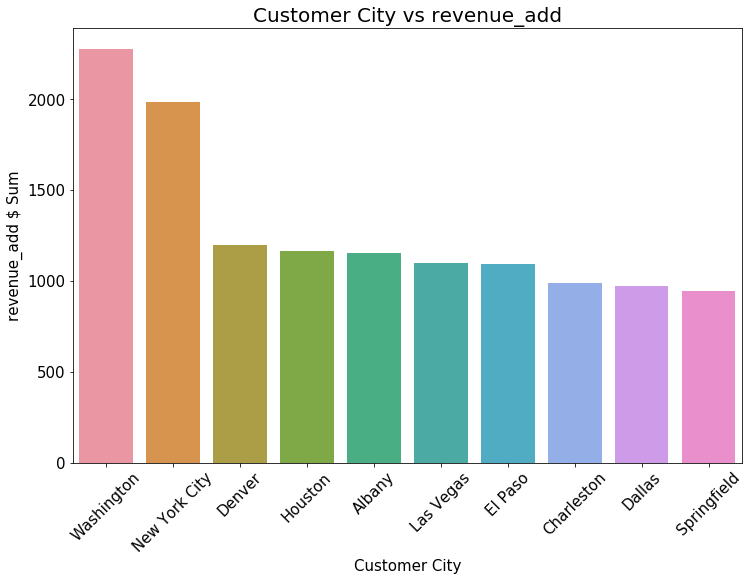

In [255]:
rev_add_city = df.groupby('Customer City').total.sum().values
cities = df.groupby('Customer City').total.sum().keys()

sorted_city_value_add = np.argsort(df.groupby('Customer City').total.sum().values)[::-1]

top_10_cities_index = sorted_city_value_add[0:10]

df_top_10_cities = pd.DataFrame(columns=['Customer City', 'revenue_add'])
df_top_10_cities['Customer City'] = cities[top_10_cities_index]
df_top_10_cities['revenue_add'] = rev_add_city[top_10_cities_index]

eda.class_vs_numerical(df_top_10_cities,'Customer City','revenue_add', 45)

cities and states

In [256]:
most_popular_states = df_nov.groupby('Supplier')['Customer State'].value_counts()
most_popular_cities = df_nov.groupby('Supplier')['Customer City'].value_counts()

In [257]:
sup_dict_cities = {}

for i in range(len(sorted(df_nov.Supplier.unique()))):
#     print(most_popular_states[sorted(df_nov.Supplier.unique())[i]])
#       print(sorted(df_nov.Supplier.unique())[i])
      sup_dict_cities[sorted(df_nov.Supplier.unique())[i]] = most_popular_cities[sorted(df_nov.Supplier.unique())[i]].keys()[0:5]

In [258]:
sup_dict_states = {}

for i in range(len(sorted(df_nov.Supplier.unique()))):
#     print(most_popular_states[sorted(df_nov.Supplier.unique())[i]])
#       print(sorted(df_nov.Supplier.unique())[i])
      sup_dict_states[sorted(df_nov.Supplier.unique())[i]] = most_popular_states[sorted(df_nov.Supplier.unique())[i]].keys()[0:5]

In [259]:
sup_dict_states
sup_dict_cities.values()

dict_values([Index(['Las Vegas', 'New York City', 'Washington', 'Springfield', 'Denver'], dtype='object', name='Customer City'), Index(['Washington', 'New York City', 'Denver', 'El Paso', 'Houston'], dtype='object', name='Customer City'), Index(['Washington', 'Oklahoma City', 'Philadelphia', 'Denver', 'Kansas City'], dtype='object', name='Customer City'), Index(['Houston', 'Washington', 'Saint Louis', 'Chattanooga', 'Cincinnati'], dtype='object', name='Customer City'), Index(['Washington', 'Clearwater', 'Colorado Springs', 'Denver', 'El Paso'], dtype='object', name='Customer City'), Index(['New York City', 'Houston', 'Rochester', 'Washington', 'Albany'], dtype='object', name='Customer City'), Index(['New York City', 'Baltimore', 'Brooklyn', 'Cincinnati', 'Clearwater'], dtype='object', name='Customer City')])

In [260]:
df_supplier_nov_female.values

array([137, 275, 162,  90, 243, 188, 118])

In [261]:
df_supplier_nov['most_popular_cities'] = sup_dict_cities.values()
df_supplier_nov['most_popular_states'] = sup_dict_states.values()

In [262]:
sup_dict_cities.values()

dict_values([Index(['Las Vegas', 'New York City', 'Washington', 'Springfield', 'Denver'], dtype='object', name='Customer City'), Index(['Washington', 'New York City', 'Denver', 'El Paso', 'Houston'], dtype='object', name='Customer City'), Index(['Washington', 'Oklahoma City', 'Philadelphia', 'Denver', 'Kansas City'], dtype='object', name='Customer City'), Index(['Houston', 'Washington', 'Saint Louis', 'Chattanooga', 'Cincinnati'], dtype='object', name='Customer City'), Index(['Washington', 'Clearwater', 'Colorado Springs', 'Denver', 'El Paso'], dtype='object', name='Customer City'), Index(['New York City', 'Houston', 'Rochester', 'Washington', 'Albany'], dtype='object', name='Customer City'), Index(['New York City', 'Baltimore', 'Brooklyn', 'Cincinnati', 'Clearwater'], dtype='object', name='Customer City')])

Adding most popular cities and states for each supplier to the data frame.

In [264]:
df_supplier_nov

,Supplier,revenue_add,revenue_add_ratio,data_point_count,unique_order_count,unique_customer_count,female_ratio,most_popular_cities,most_popular_states
4,A,3586.9,9.7%,272,252,224,50.4%,"Index(['Las Vegas', 'New York City', 'Washingt...","Index(['Texas', 'Florida', 'California', 'New ..."
0,B,8363.3,22.5%,581,495,389,47.3%,"Index(['Washington', 'New York City', 'Denver'...","Index(['Texas', 'California', 'New York', 'Flo..."
3,C,4580.2,12.3%,329,303,262,49.2%,"Index(['Washington', 'Oklahoma City', 'Philade...","Index(['Texas', 'Florida', 'California', 'New ..."
5,D,3213.3,8.6%,227,180,161,47.1%,"Index(['Houston', 'Washington', 'Saint Louis',...","Index(['Florida', 'Texas', 'California', 'New ..."
1,E,7782.1,20.9%,487,432,338,49.9%,"Index(['Washington', 'Clearwater', 'Colorado S...","Index(['Florida', 'Texas', 'California', 'New ..."
2,F,6544.4,17.6%,391,352,286,48.1%,"Index(['New York City', 'Houston', 'Rochester'...","Index(['Florida', 'Texas', 'New York', 'Califo..."
6,G,3098.5,8.3%,191,207,194,52.0%,"Index(['New York City', 'Baltimore', 'Brooklyn...","Index(['Texas', 'California', 'Florida', 'New ..."


In [265]:
most_popular_states[sorted(df_nov.Supplier.unique())[1]].keys()[0:15]

Index(['Texas', 'California', 'New York', 'Florida', 'Ohio', 'Georgia',
       'North Carolina', 'District of Columbia', 'Colorado', 'Washington',
       'Pennsylvania', 'Michigan', 'Minnesota', 'Connecticut', 'Virginia'],
      dtype='object', name='Customer State')

In [266]:
sup_dict_states.values()

dict_values([Index(['Texas', 'Florida', 'California', 'New York', 'Colorado'], dtype='object', name='Customer State'), Index(['Texas', 'California', 'New York', 'Florida', 'Ohio'], dtype='object', name='Customer State'), Index(['Texas', 'Florida', 'California', 'New York', 'Ohio'], dtype='object', name='Customer State'), Index(['Florida', 'Texas', 'California', 'New York', 'Missouri'], dtype='object', name='Customer State'), Index(['Florida', 'Texas', 'California', 'New York', 'Ohio'], dtype='object', name='Customer State'), Index(['Florida', 'Texas', 'New York', 'California', 'Ohio'], dtype='object', name='Customer State'), Index(['Texas', 'California', 'Florida', 'New York', 'Ohio'], dtype='object', name='Customer State')])

Value add of best performing cities(complete data)

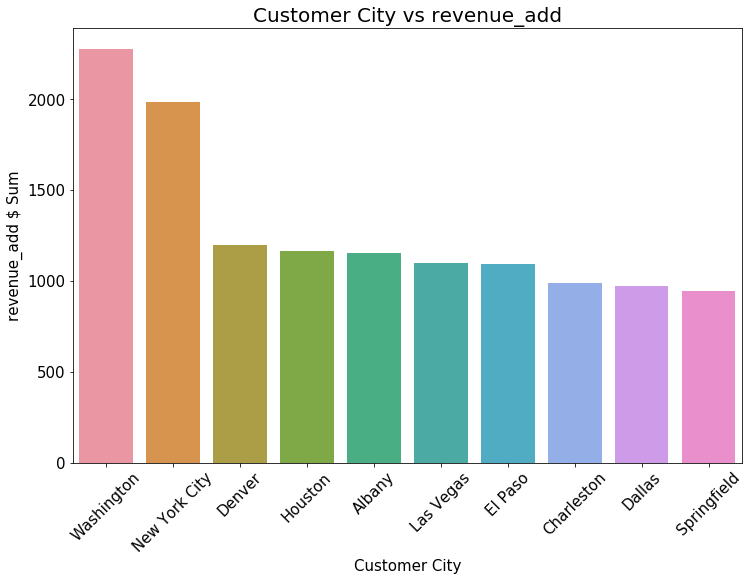

In [267]:
most_popular_states[sorted(df_nov.Supplier.unique())[1]][0:15]

rev_add_city = df.groupby('Customer City').total.sum().values
cities = df.groupby('Customer City').total.sum().keys()

sorted_city_value_add = np.argsort(df.groupby('Customer City').total.sum().values)[::-1]

top_10_cities_index = sorted_city_value_add[0:10]

df_top_10_cities = pd.DataFrame(columns=['Customer City', 'revenue_add'])
df_top_10_cities['Customer City'] = cities[top_10_cities_index]
df_top_10_cities['revenue_add'] = rev_add_city[top_10_cities_index]

eda.class_vs_numerical(df_top_10_cities,'Customer City','revenue_add', 45)

In [268]:
sup_dict_states['A']

Index(['Texas', 'Florida', 'California', 'New York', 'Colorado'], dtype='object', name='Customer State')

**Order Date**

Just want to be sure if all of these datapoints account for 2018.

In [269]:
df['Order Date'].dt.year.unique()  #yes they are

array([2018])


This means I shall seperate the timestamp data based on only months(for now).

In [270]:
df['Order Date'].dt.month.unique()

array([10, 11])

The data accounts for October and November.

Adding a new feature : month

In [271]:
df['month'] = df['Order Date'].dt.month

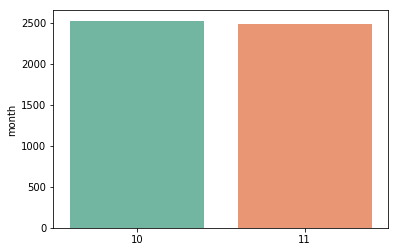

In [272]:
eda.seaborn_count_barplot(df,'month')

They are almost equal in numbers.

Lets have a look at how suppliers performed in accordance to months.

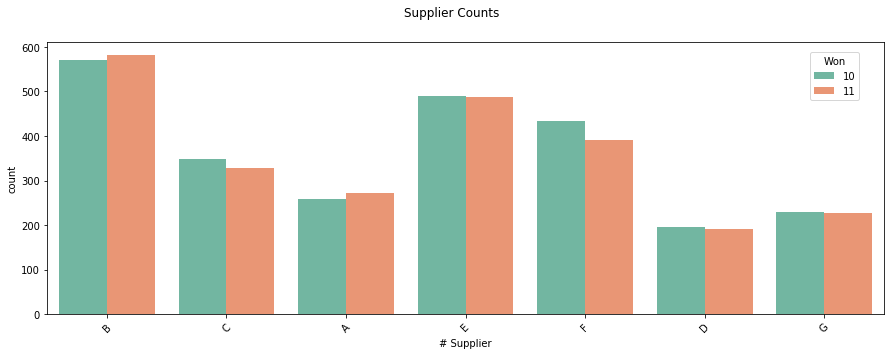

In [273]:
eda.barplot_vs_test(df,'Supplier','month')


There is minor variation among the performance of the different suppliers between October and November.

When it comes to particularly Supplier C, the number of products sales delivered slightly decreased.

Just wanted to see visualize on what portion of the data I will be working on through the assignment. Looks like it is about ~ 6.3% of all the data provided.

**Create the Subset**

Where Supplier == 'C' and Month == 11 (November)

In [274]:
df = df[(df['month'] == 11) & (df['Supplier'] == 'C')]

In [275]:
df.shape 

(329, 16)

In [276]:
df.shape[0] / df_2.shape[0] #6.6% of all data 

0.0658

**confirm**

In [277]:
df[['Supplier','month']].head() #great!

,Supplier,month
2524,C,11
2527,C,11
2535,C,11
2554,C,11
2555,C,11


Features Supplier and month already served their purpose.

In [278]:
df.drop(['Supplier','month'],axis=1, inplace = True)

**Order Number & Name**

In [279]:
print(f"Number of unique orders {len(df['Order Number'].unique())}")
print(f"Ratio of unique orders {round((len(df['Order Number'].unique()) / df.shape[0]) * 100)}% ")

Number of unique orders 303
Ratio of unique orders 92% 


Creating a new column called full_name

In [280]:
df.head()

,Order Number,Sku,Quantity Sold,Unit Price,Order Date,Product Type,Customer First Name,Customer Last Name,Customer Gender,Customer Street Address,Customer City,Customer State,Customer Zipcode,total
2524,1874,C-12371,2,4.57,2018-11-01,Sports,Daloris,Lethby,Female,5946 Ilene Trail,Pensacola,Florida,32575,9.1
2527,1875,C-10903,2,5.13,2018-11-01,Automotive,Archy,Purdie,Male,602 Daystar Point,Rochester,Minnesota,55905,10.3
2535,1879,C-21830,2,2.20,2018-11-01,Outdoors,Terza,Ramshay,Female,121 Aberg Lane,Austin,Texas,78721,4.4
2554,1892,C-26326,1,6.74,2018-11-01,Music,Pooh,Beathem,Male,24 Redwing Center,Sacramento,California,95838,6.7
2555,1892,C-22418,1,7.06,2018-11-01,Electronics,Pooh,Beathem,Male,24 Redwing Center,Sacramento,California,95838,7.1


In [281]:
df['full_name'] = df_2['Customer First Name'] + " " + df_2['Customer Last Name']
# df = df.drop(['Customer First Name','Customer Last Name'],axis = 1) # another way to drop them

In [282]:
print(f"Number of unique customers {len(df.full_name.unique())}")

Number of unique customers 262


**repeated Order Numbers**

In [283]:
((df['Order Number'].value_counts(sort = False)) > 1).keys()

Int64Index([2048, 2420, 3574, 3078, 2567, 2056, 3271, 2059, 3210, 2576,
            ...
            3055, 2544, 2911, 3177, 2036, 2692, 2038, 2039, 2916, 3071],
           dtype='int64', length=303)

**repeated full_names**

In [284]:
((df['full_name'].value_counts(sort = False)) > 1).keys()[((df['full_name'].value_counts(sort = False)) > 1).values]

Index(['Marisa Edmett', 'Kimberlyn Dockrell', 'Constancia Brewse',
       'Mildred Barthot', 'Karoly Hellard', 'Elbert Showte', 'Maurice Yakutin',
       'Koo Hing', 'Zahara Fatharly', 'Drusie Meagh', 'Riley Moretto',
       'Barclay Crangle', 'Otis Von Gladbach', 'Minerva Roaf', 'Rurik Saiens',
       'Korie Frontczak', 'Lothaire Van Der Weedenburg', 'Jacobo Stripling',
       'Konstanze Spradbery', 'Sherwynd Randerson', 'Cathyleen Groger',
       'Connor Dixcee', 'Erinna Cuphus', 'Sondra Krzysztof',
       'Carmelia Amberson', 'Mickie Thomtson', 'Emory Bottby', 'Gina Lofting',
       'Cammie Shalcros', 'Davon Fessier', 'Gilda Wychard', 'Fanchon Thonason',
       'Lion Ricketts', 'Garvey Breakwell', 'Isador Shuttleworth',
       'Malorie Napier', 'Pooh Beathem', 'Fairleigh Mc Trusty', 'Waylin Bondy',
       'Archibold Davidde', 'Oswell Hugonneau', 'Elsey Middleweek',
       'Harley Edkins', 'Addi Attrill', 'Erskine Quayle', 'Leilah Victory',
       'Warner Omrod', 'Fan Joyson', 'Andie

In [286]:
df['total'] =  round(df['Quantity Sold'] * df['Unit Price'],1)
#total is same with revenue_add. Will fix it later when I change the functions in src document so no one gets confused.

**Total reveneue added per customer of Supplier C**

In [287]:
df.groupby('full_name').total.sum().head()

full_name
Addi Attrill            14.8
Addi Folonin             6.7
Adriena Sharville       11.6
Agnesse Fergyson         9.2
Alexandrina LLelweln    11.0
Name: total, dtype: float64

In [288]:
rev_add = df.groupby('full_name').total.sum().values
customer= df.groupby('full_name').total.sum().keys()

**Revenue Generation Per Customer**

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text yticklabel objects>)

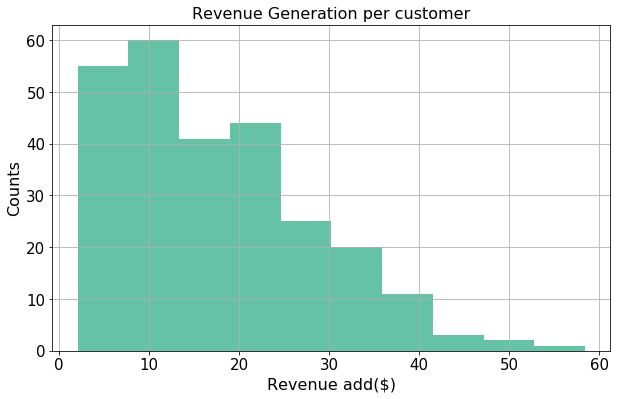

In [290]:
df.groupby('full_name').total.sum().hist(figsize=(10,6))
plt.title('Revenue Generation per customer', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xlabel('Revenue add($)', fontsize=16)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
# plt.figure(figsize=(20,20))


In [291]:
rev_add.mean()

17.48167938931298

**Top 10 Customers of the Month** (loyalty program maybe)

way 1: customer_revenue_dictionary

In [292]:
customer_revenue_dictionary = {}

for i in range(0,len(rev_add)):
    customer_revenue_dictionary[customer[i]] = round(rev_add[i],1)

In [293]:
customer_revenue_dictionary_sorted = sorted(customer_revenue_dictionary.items(), key=lambda x: int(x[1]),reverse=True)

In [294]:
customer_revenue_dictionary_sorted[0:10]

[('Davon Fessier', 58.4),
 ('Terza Ramshay', 49.8),
 ('Mickie Thomtson', 47.6),
 ('Garvey Breakwell', 45.8),
 ('Minerva Roaf', 45.2),
 ('Karoly Hellard', 41.7),
 ('Paige Lemasney', 41.2),
 ('Carmelia Amberson', 40.6),
 ('Drusie Meagh', 40.5),
 ('Elbert Showte', 40.8)]

way 2: np.argsort

In [295]:
sorted_customer_value_add = np.argsort(df.groupby('full_name').total.sum().values)[::-1]

In [296]:
top_10_customer_index = sorted_customer_value_add[0:10]

In [297]:
df_top_10 = pd.DataFrame(columns=['full_name', 'revenue_add'])
df_top_10['full_name'] = customer[top_10_customer_index]
df_top_10['revenue_add'] = rev_add[top_10_customer_index]

In [298]:
df_top_10

,full_name,revenue_add
0,Davon Fessier,58.4
1,Terza Ramshay,49.8
2,Mickie Thomtson,47.6
3,Garvey Breakwell,45.8
4,Minerva Roaf,45.2
5,Karoly Hellard,41.7
6,Paige Lemasney,41.2
7,Elbert Showte,40.8
8,Koo Hing,40.6
9,Carmelia Amberson,40.6


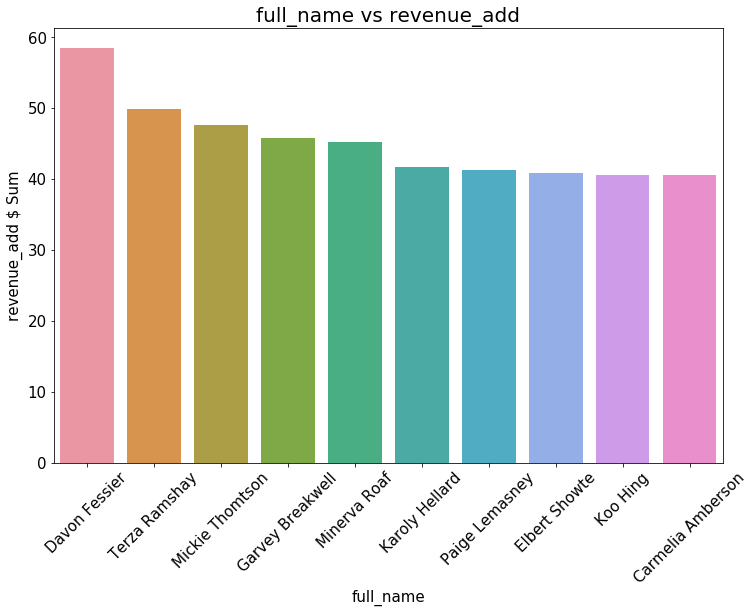

In [299]:
eda.class_vs_numerical(df_top_10,'full_name','revenue_add',45)

Probably the analyst who is going through this is telling him/herself something like: "Hey this guy really likes vertical barplots eh?" Let me surprise you by demonstrating my knowledge.

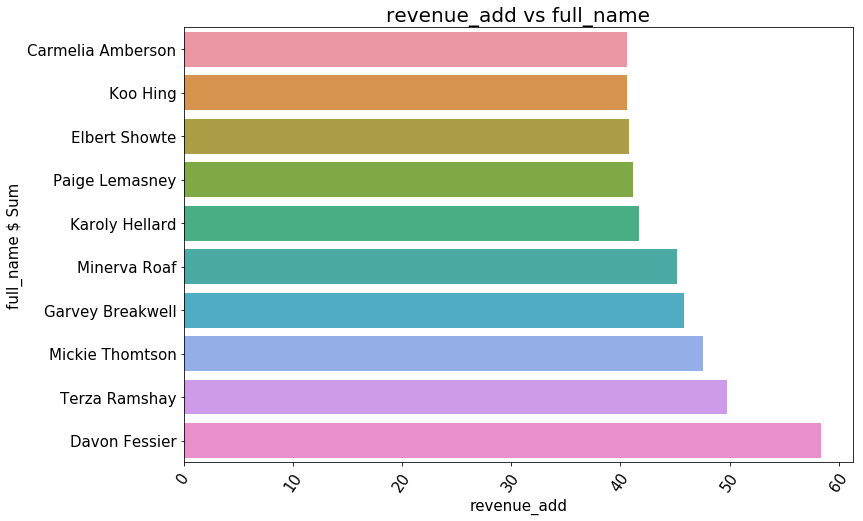

In [300]:
eda.class_vs_numerical_horizontal(df_top_10,'revenue_add','full_name')

Tadaaaaa! :) 

Revenue add by each customer:

In [303]:
df.groupby('full_name').total.sum()[sorted_customer_value_add]

full_name
Davon Fessier          58.4
Terza Ramshay          49.8
Mickie Thomtson        47.6
Garvey Breakwell       45.8
Minerva Roaf           45.2
Karoly Hellard         41.7
Paige Lemasney         41.2
Elbert Showte          40.8
Koo Hing               40.6
Carmelia Amberson      40.6
Drusie Meagh           40.5
Nathanil Anscombe      39.8
Bernelle Jeannequin    39.8
Zahara Fatharly        39.3
Gaspard Inston         38.1
Catlaina Godsell       37.8
Oswell Hugonneau       36.1
Angel Moorfield        35.7
Powell Gerritsma       35.6
Mohandas Bithell       35.6
Braden Mabee           35.6
Isador Shuttleworth    35.5
Ancell Lakenden        35.3
Gilda Wychard          34.7
Cassy McKenna          34.6
Hans Halfhide          33.7
Honoria Dafydd         33.7
Armand Turpie          33.7
Rosina Chugg           33.1
Lion Ricketts          32.7
                       ... 
Burg Entwistle          4.9
Caril Corfield          4.9
James Dwyr              4.9
Marlin Jollands         4.8
Manuel Sch

**Quantity Sold**

In [304]:
df['Quantity Sold'].value_counts() # nice to see that it is never 0.

2    74
5    68
4    63
3    62
1    62
Name: Quantity Sold, dtype: int64

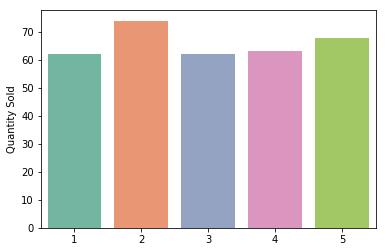

In [305]:
eda.seaborn_count_barplot(df,'Quantity Sold')

Seem to be pretty balanced. Most purchases are done in terms of small batches.

**Unit Price**

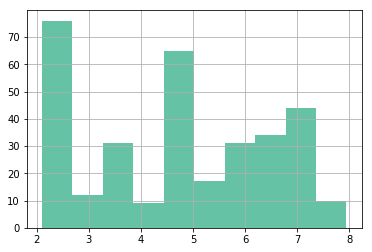

In [306]:
df['Unit Price'].hist()

I want something more detailed.

Unit Price: subset

count    329.000000
mean       4.707538
std        1.821309
min        2.100000
25%        2.780000
50%        4.890000
75%        6.620000
max        7.950000
Name: Unit Price, dtype: float64


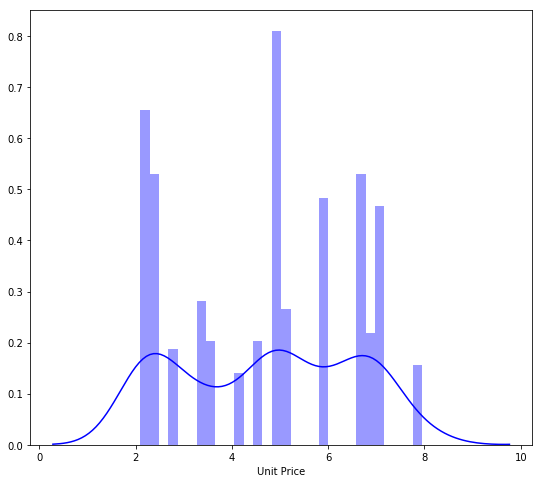

In [307]:
print(df['Unit Price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Unit Price'], color='b', bins= 30, hist_kws={'alpha': 0.4});

Unit Price: complete data

count    329.000000
mean       4.707538
std        1.821309
min        2.100000
25%        2.780000
50%        4.890000
75%        6.620000
max        7.950000
Name: Unit Price, dtype: float64


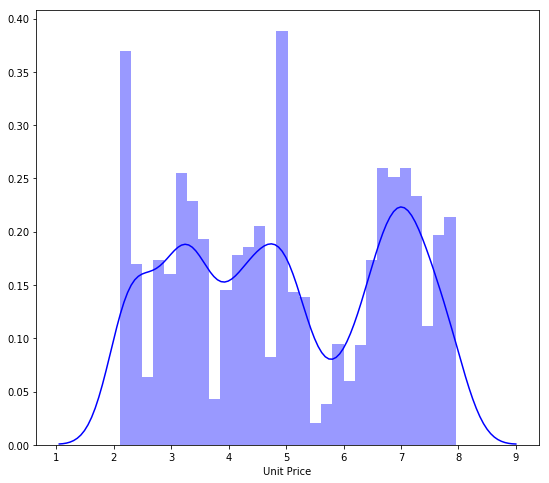

In [175]:
print(df['Unit Price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_2['Unit Price'], color='b', bins= 30, hist_kws={'alpha': 0.4});

Unit price of the products ranged between 2.1 to 8

**Total** = quantity_sold * unit_price

In [308]:
df['total'] =  round(df['Quantity Sold'] * df['Unit Price'],1)

count    329.000000
mean      13.921581
std        8.628109
min        2.100000
25%        6.900000
50%       11.600000
75%       19.900000
max       39.800000
Name: total, dtype: float64


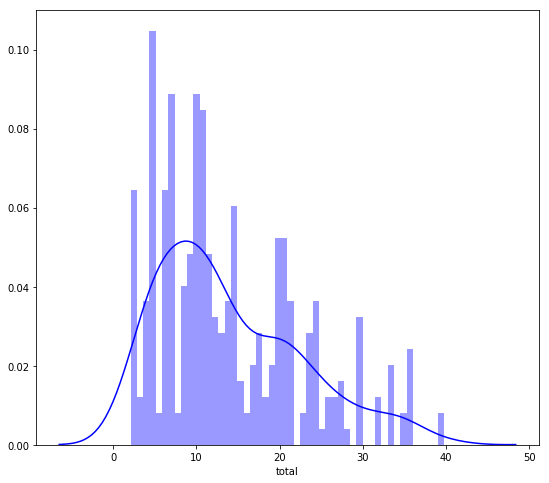

In [309]:
print(df['total'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['total'], color='b', bins= 50, hist_kws={'alpha': 0.4});


Total revenue generated per product sales varies from 2.1 to ~ 40 and skewed towards the right side of the graph with a mean of ~14.

How about total revenue generated per order?

count    303.000000
mean      15.116172
std        9.304249
min        2.100000
25%        7.650000
50%       12.300000
75%       20.700000
max       40.600000
Name: total, dtype: float64


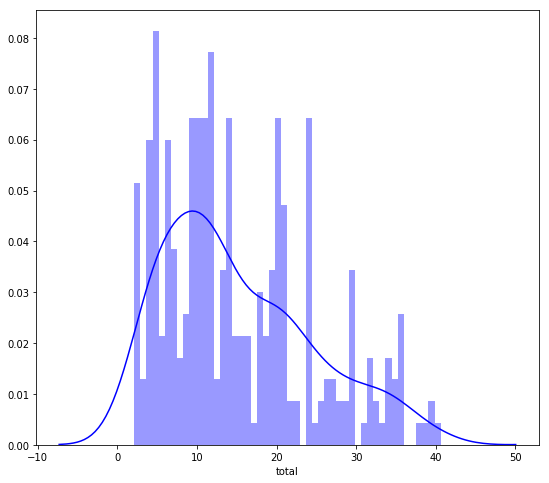

In [310]:
df.groupby('Order Number')['total'].sum()

print(df.groupby('Order Number')['total'].sum().describe())
plt.figure(figsize=(9, 8))
sns.distplot(df.groupby('Order Number')['total'].sum(), color='b', bins= 50, hist_kws={'alpha': 0.4});

Total Revenue generated through Supplier C for November only.

In [311]:
df.total.sum()

4580.2

**Order Date**

days and weeks

In [312]:
df['day']  = df['Order Date'].dt.day
df['week'] = df['Order Date'].dt.week

**day**

day: subset

count    329.000000
mean      15.629179
std        8.398018
min        1.000000
25%        8.000000
50%       17.000000
75%       23.000000
max       30.000000
Name: day, dtype: float64


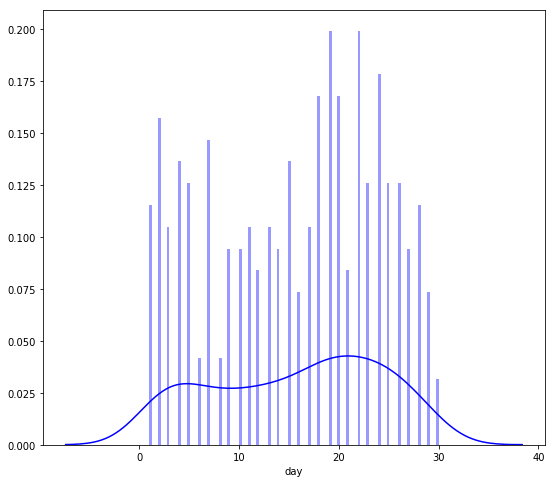

In [315]:
print(df['day'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['day'], color='b', bins= 100, hist_kws={'alpha': 0.4});

day: complete data

count    5000.000000
mean       16.041000
std         8.831247
min         1.000000
25%         8.000000
50%        16.000000
75%        24.000000
max        31.000000
Name: day, dtype: float64


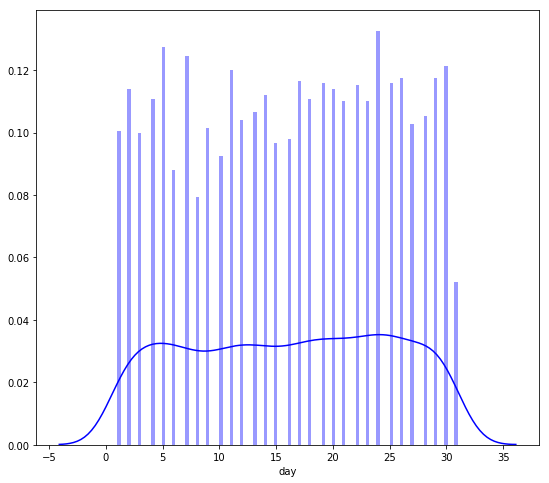

In [317]:
df_2['day'] =  df_2['Order Date'].dt.day
print(df_2['day'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_2['day'], color='b', bins= 100, hist_kws={'alpha': 0.4});

Number of Product purchases is slightly higher at the beginning and towards the end of November.

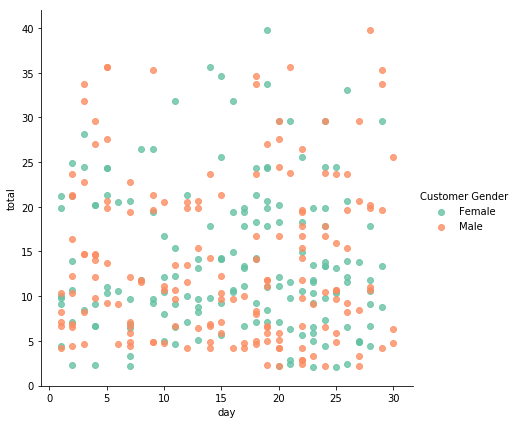

In [318]:
sns.lmplot(x='day', y='total', fit_reg=False, data=df, hue='Customer Gender',size = 6);

You are not really useful this time arent you? This doesn't really tell a lot. 

In [319]:
df.total.mean()

13.92158054711246

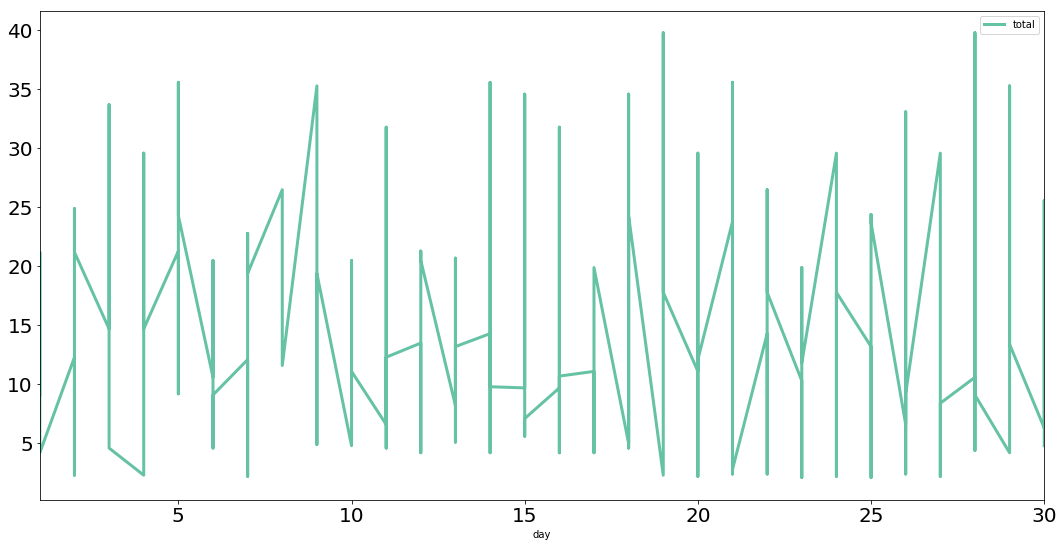

In [320]:
df.plot.line(x = 'day', y = 'total', figsize = (18,9), linewidth = 3, fontsize = 20)

this doesn't tell a lot either.

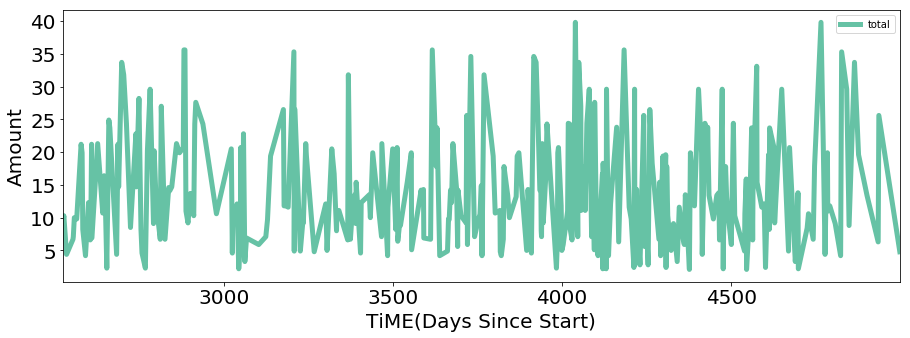

In [321]:
df[['total']].plot(figsize=(15,5), linewidth=5, fontsize=20)
# df_create[['Amount_test']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.ylabel('Amount', fontsize=20);
plt.xlabel('TiME(Days Since Start)', fontsize=20);

amazing... 

Looks like we do not have enough data points to visualize this nicely. Nevertheless total rev is not corrolated with days of the month. Lets prove that.

In [322]:
df[['total','day']].corr().total.day

-0.00912909612274369

With only a very weak - 1 % corrolation as number of days increases total decreases. Which is pretty much meaningless.

**Product Type**

In [324]:
df['Product Type'].unique()

array(['Sports', 'Automotive', 'Outdoors', 'Music', 'Electronics',
       'Tools', 'Jewelery', 'Clothing', 'Home', 'Books', 'Kids',
       'Computers', 'Toys', 'Movies', 'Beauty', 'Baby'], dtype=object)

In [325]:
df['Product Type'].value_counts()

Jewelery       36
Clothing       31
Outdoors       30
Toys           29
Electronics    27
Home           27
Music          19
Tools          18
Automotive     17
Computers      16
Baby           16
Kids           14
Movies         14
Sports         13
Books          12
Beauty         10
Name: Product Type, dtype: int64

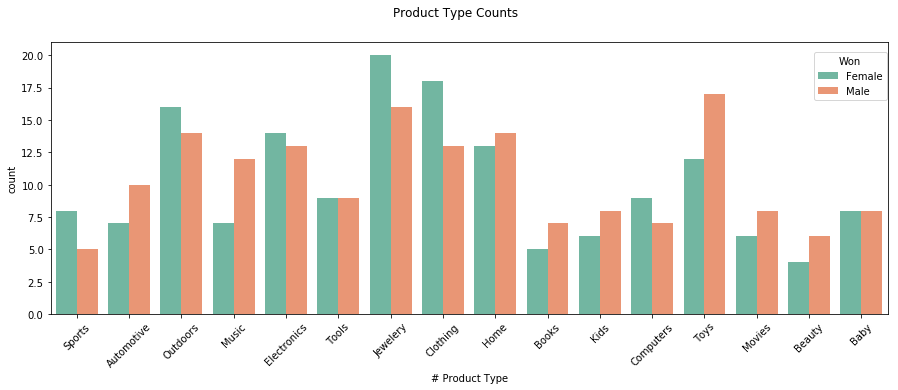

In [326]:
eda.barplot_vs_test(df,'Product Type','Customer Gender')

The most popular products types provided by Supplier C are Jewellery, Clothing, Outdoors, Toys, Home and Electronics.

Females are more dominant in numbers for the most frequently bought products types.

Which product categories generate the most revenue?

In [327]:
df_product_totals = df.groupby('Product Type')['total'].sum()

In [328]:
df_product_totals.keys()

Index(['Automotive', 'Baby', 'Beauty', 'Books', 'Clothing', 'Computers',
       'Electronics', 'Home', 'Jewelery', 'Kids', 'Movies', 'Music',
       'Outdoors', 'Sports', 'Tools', 'Toys'],
      dtype='object', name='Product Type')

In [329]:
df_product_totals.values

array([251.4, 128.2, 254.5,  73.5, 510.8, 348.3, 319.4, 247.4, 512.1,
       290. , 278.1, 350.3, 264.7, 173.4, 193.8, 384.3])

In [330]:
df_product = pd.DataFrame(columns=['Product Type', 'revenue_add'])
df_product['Product Type'] = df_product_totals.keys()
df_product['revenue_add'] = df_product_totals.values

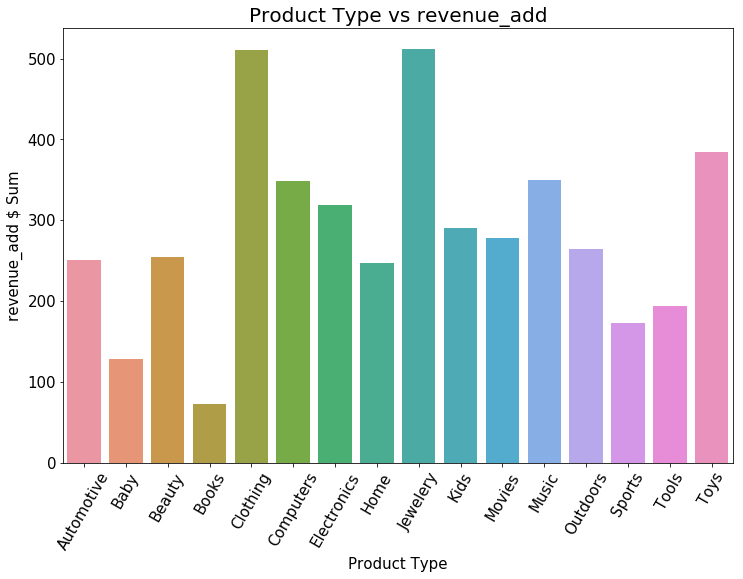

In [331]:
eda.class_vs_numerical(df_product,'Product Type','revenue_add',60)

Product types vs revenue per total(quantity sold * unit price)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

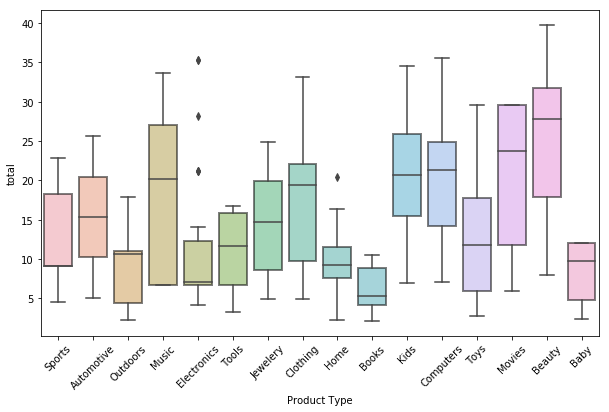

In [335]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Product Type', y='total', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

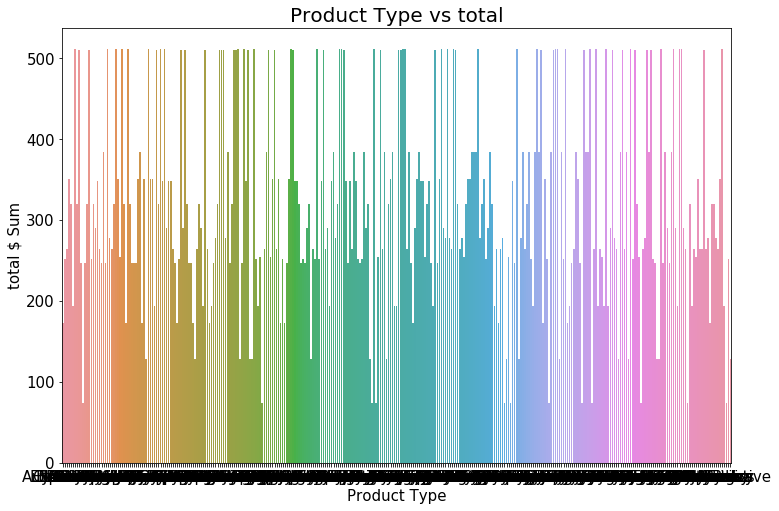

In [336]:
eda.class_vs_numerical(df,'Product Type','total')  # I know I knowww, its useless but looks cool so it stays:) 

In [337]:
df.columns

Index(['Order Number', 'Sku', 'Quantity Sold', 'Unit Price', 'Order Date',
       'Product Type', 'Customer First Name', 'Customer Last Name',
       'Customer Gender', 'Customer Street Address', 'Customer City',
       'Customer State', 'Customer Zipcode', 'total', 'full_name', 'day',
       'week'],
      dtype='object')

**Gender**

Count comparison

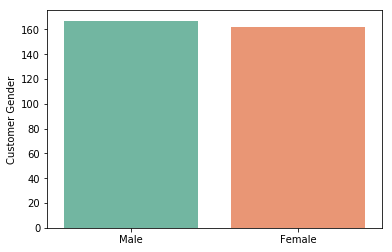

In [339]:
eda.seaborn_count_barplot(df,'Customer Gender') # equality in numbers nice!

Revenue Add Comparison

In [340]:
df.groupby('Customer Gender').total.sum() # again almost same

Customer Gender
Female    2260.5
Male      2319.7
Name: total, dtype: float64

Product Type Preferences of Customers with Regard to Gender

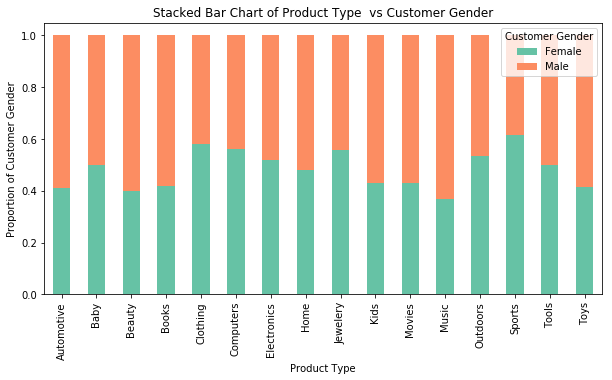

In [341]:
eda.stacked_bar_chart(df,'Product Type','Customer Gender')

### Revenue Generation with respect to regions

Number of unique cities:

In [343]:
len(df['Customer City'].unique())

144

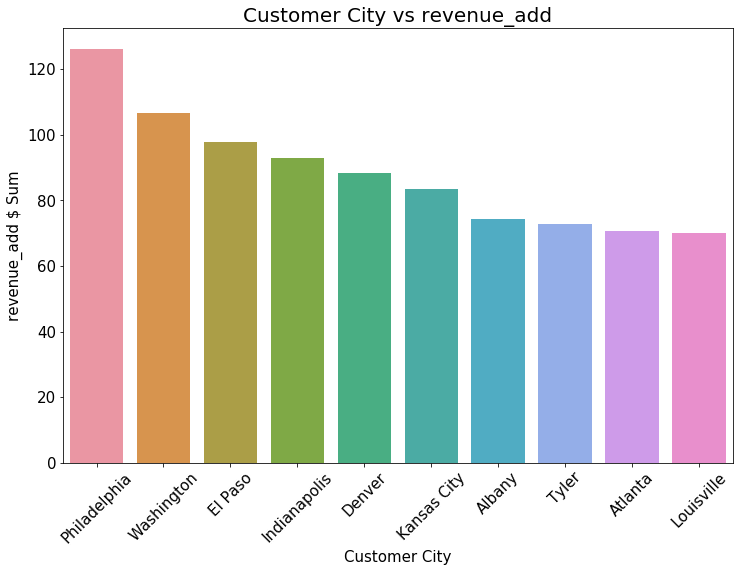

In [344]:
rev_add_city = df.groupby('Customer City').total.sum().values
cities = df.groupby('Customer City').total.sum().keys()

sorted_city_value_add = np.argsort(df.groupby('Customer City').total.sum().values)[::-1]

top_10_cities_index = sorted_city_value_add[0:10]

df_top_10_cities = pd.DataFrame(columns=['Customer City', 'revenue_add'])
df_top_10_cities['Customer City'] = cities[top_10_cities_index]
df_top_10_cities['revenue_add'] = rev_add_city[top_10_cities_index]

eda.class_vs_numerical(df_top_10_cities,'Customer City','revenue_add', 45)


**Customer Street Address**

Number of unique street addresses

In [345]:
len(df['Customer Street Address'].unique())

262

I wonder if there is a difference between the number of exact unique addresses and number of unique streets.

Following function will get rid of numerical values within the street address. Thereby we will be able to find out if some of our customers live in the same street.

How? A difference in value counts of unique will demonstrate that.

In [346]:
def back_street(x):
    nums = "0123456789"
    street = ""
    for c in x:
        if c not in nums:
            street += c
    return street[1:len(street)]
    

In [347]:
df['street_name'] = df['Customer Street Address'].map(back_street)

In [348]:
len(df['street_name'].unique()) 

260

Looks like 2 of the customers live in the same street.

Not a very important piece of information.

**Customer State**

In [349]:
df['Customer State'].value_counts()

Texas                   36
Florida                 35
California              30
New York                18
Ohio                    17
Georgia                 11
Colorado                11
Virginia                10
Illinois                10
Indiana                 10
Pennsylvania            10
District of Columbia    10
Oklahoma                10
Missouri                10
Arizona                  8
Connecticut              8
Michigan                 8
Washington               7
Minnesota                6
Nevada                   6
Tennessee                6
North Carolina           6
Kentucky                 6
Maryland                 5
Alabama                  5
Oregon                   4
Wisconsin                4
New Jersey               4
Kansas                   4
South Carolina           3
Utah                     3
Louisiana                2
Massachusetts            1
West Virginia            1
Nebraska                 1
Alaska                   1
Delaware                 1
I

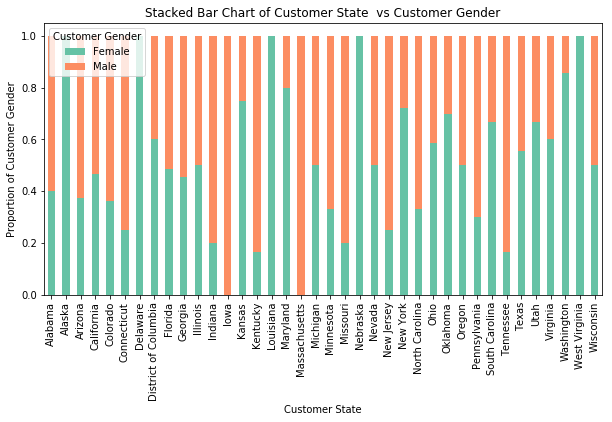

In [350]:
eda.stacked_bar_chart(df,'Customer State','Customer Gender')

**Revenue Generation Per Customer State**

**All States**

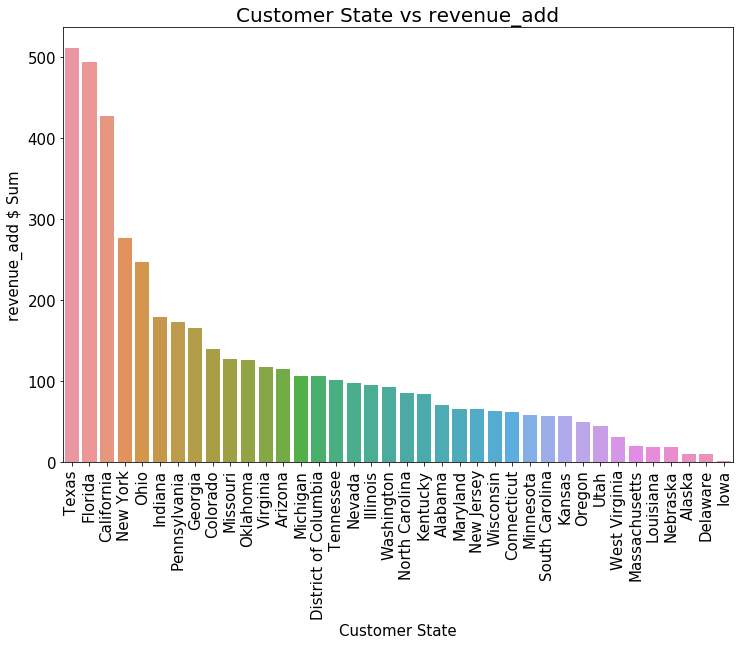

In [351]:
rev_add_state = df.groupby('Customer State').total.sum().values
states = df.groupby('Customer State').total.sum().keys()

sorted_state_value_add = np.argsort(df.groupby('Customer State').total.sum().values)[::-1]

# top_10_cities_index = sorted_city_value_add[0:10]

df_states = pd.DataFrame(columns=['Customer State', 'revenue_add'])
df_states['Customer State'] = states[sorted_state_value_add]
df_states['revenue_add'] = rev_add_state[sorted_state_value_add]

eda.class_vs_numerical(df_states,'Customer State','revenue_add',90)

**Top 15 States**

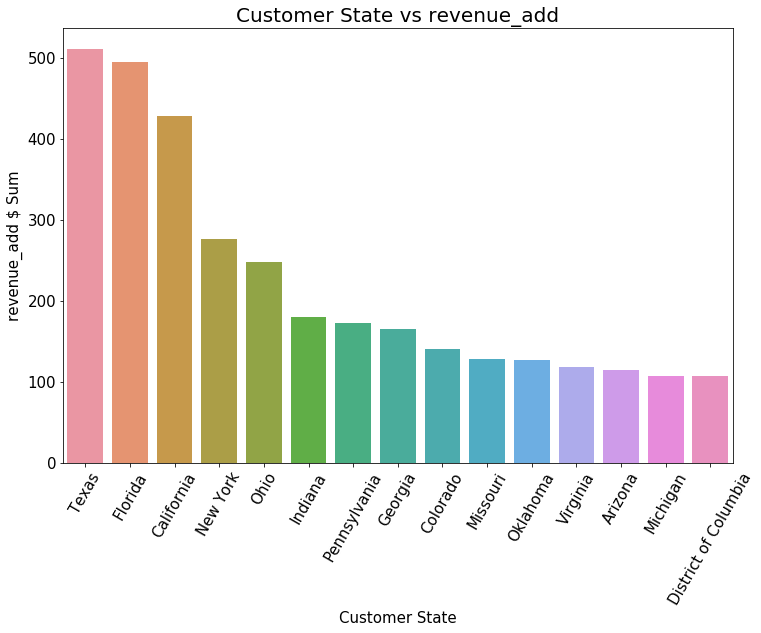

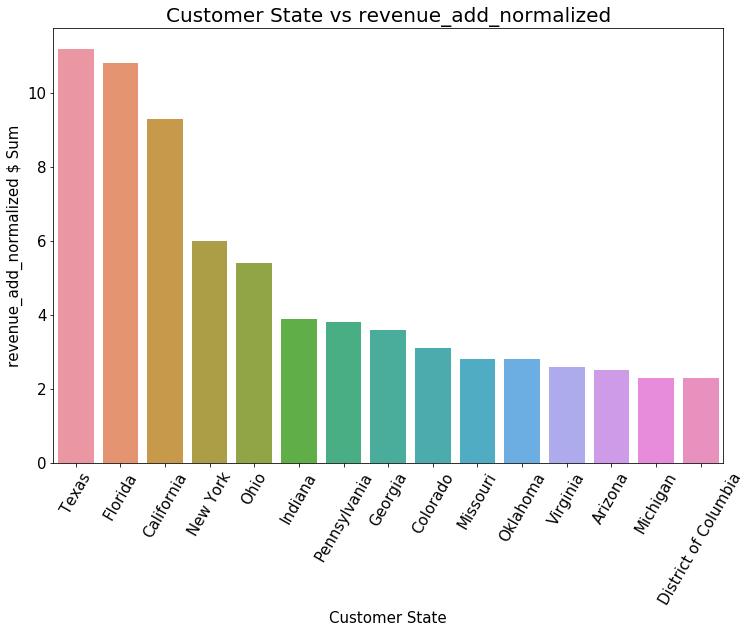

In [353]:
rev_add_state = df.groupby('Customer State').total.sum().values
rev_add_state_normalized = ((rev_add_state / rev_add_state.sum())*100).round(1)
states = df.groupby('Customer State').total.sum().keys()

sorted_state_value_add_index = np.argsort(df.groupby('Customer State').total.sum().values)[::-1]

top_15_states_index = sorted_state_value_add_index[0:15]

df_states_top_15 = pd.DataFrame(columns=['Customer State', 'revenue_add'])
df_states_top_15['Customer State'] = states[top_15_states_index]
df_states_top_15['revenue_add'] = rev_add_state[top_15_states_index]
df_states_top_15['revenue_add_normalized'] = rev_add_state_normalized[top_15_states_index]

eda.class_vs_numerical(df_states_top_15,'Customer State','revenue_add',60)
eda.class_vs_numerical(df_states_top_15,'Customer State','revenue_add_normalized',60)

In [354]:
((rev_add_state / rev_add_state.sum())*100).round(1)

array([ 1.6,  0.2,  2.5,  9.3,  3.1,  1.4,  0.2,  2.3, 10.8,  3.6,  2.1,
        3.9,  0. ,  1.2,  1.8,  0.4,  1.4,  0.4,  2.3,  1.3,  2.8,  0.4,
        2.1,  1.4,  6. ,  1.9,  5.4,  2.8,  1.1,  3.8,  1.3,  2.2, 11.2,
        1. ,  2.6,  2. ,  0.7,  1.4])

**Prepare Data For Tableau Map Visulization**

In [357]:
rev_add_city = df.groupby('Customer City').total.sum().values
rev_add_city_normalized = ((rev_add_city / rev_add_city.sum())*100).round(1)
cities = df.groupby('Customer City').total.sum().keys()

sorted_city_value_add_index = np.argsort(df.groupby('Customer City').total.sum().values)[::-1]

# top_15_cities_index = sorted_state_value_add_index[0:15]

df_cities = pd.DataFrame(columns=['Customer City', 'revenue_add'])
df_cities['Customer City'] = cities[sorted_city_value_add_index]
df_cities['revenue_add'] = rev_add_city[sorted_city_value_add_index]
df_cities['revenue_add_normalized'] = rev_add_city_normalized[sorted_city_value_add_index]

In [358]:
# df_states.to_csv('~/Desktop/states_tableau.csv')
# df_states.to_csv('~/Desktop/states_tableau_15.csv')

In [359]:
# df_cities.to_csv('~/Desktop/cities_tableau.csv')

**Tableau Geographical data vs Revenue Add Visulization**

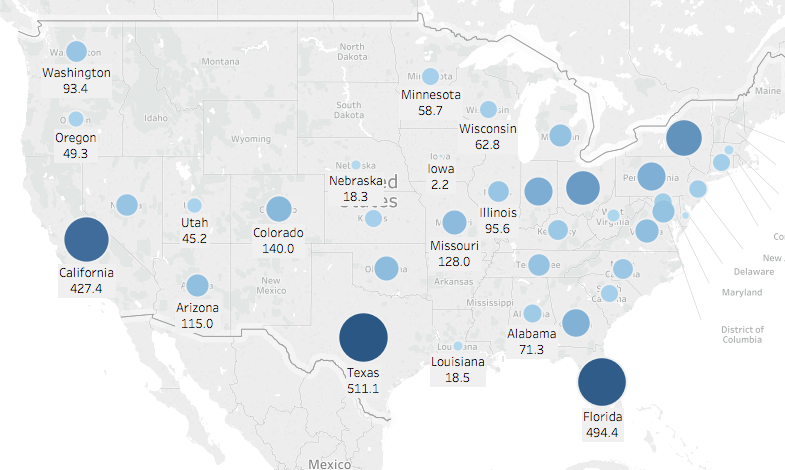

In [360]:
from IPython.display import Image
Image("images/a2_states.png") 
#tableau public visuals, yeah yeah I know haters gona hate. 
#yeah btw thats how you can Include screenshots on your ipython notebook.

## To do next

- concentrate a little more on supplier competition
- do the same thing you did with cities and states to product types. Add the most frequently sold product types to df_supplier and compare them with C.
- now I wonder which product types are most frequently sold among the top 15 states. Have a look
- compare the strongest supplier B with C on tableau map. We know they compete for some states and cities, nevertheless shouting out the numbers will be beneficial